# Prophet template light (solo quick views)

In [819]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

### Scelgo una colonna e imposto il dataframe come vuole prophet

In [820]:
df = pd.read_excel('~/Desktop/Gianfranco Analisi Dati/Datasets/SerieStoriche/db_assunzioni.xlsx') #INSERIRE DATASET DA USARE
df.rename(columns={df.columns[0]:'ds'},inplace=True)
column = 'N82_L' #INSERIRE COLONNA SU CUI FARE L'ANALISI
df_ready = df[['ds',column]]
df_ready.rename(columns={column:'y'},inplace=True)
df_ready.head()

/home/davide/.local/lib/python3.8/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,ds,y
0,2010-01-01,48
1,2010-02-01,43
2,2010-03-01,43
3,2010-04-01,54
4,2010-05-01,30


## PARAMETRIZZAZIONE PROPHET

### PARAMETRI TREND PROPHET <br/>

1. **intervallo**: intervallo della serie in cui si cercano i change points e si è sensibili al trend <br/>
    Es. intervallo=0.8 -> i changepoints il trend verranno considerati dall'inizio fino al 80% della lunghezza della serie<br/>
    VALORE DEFAULT: 0.8<br/>
    PRO: aumento precisione nel seguire il trend a fine serie<br/>
    CONTRO: pericolo overfitting<br/>
    <br/>
2. **n_max_punti_cambio**: numero massimo di change points rilevabili<br/>
    VALORE DEFAULT: 25<br/>
    PRO: aumento dettaglio<br/>
    CONTRO: troppi punti anche insignificanti<br/><br/>
    <br/>
3. **sensibilita_cambio_trend**: sensibilita' ai cambi di trend<br/>
    VALORE DEFAULT: 0.05<br/>
    PRO: aumento precisione nel seguire il trend<br/>
    CONTRO: pericolo overfitting<br/><br/>


In [822]:
intervallo=0.9
n_max_punti_cambio=15
sensibilita_cambio_trend=2

### PARAMETRI STAGIONALITÀ PROPHET<br/>

1. **sensibilita_cambio_stagionalita**: sensibilità ai cambi di stagionalità<br/>
    VALORE DEFAULT: 10<br/>
    PRO: aumento precisione nel seguire stagionalità<br/>
    CONTRO: pericolo overfitting<br/>
    <br/>
2. **rilevazione_stagionalita_annuale**: rilevamento stagionalità annuale<br/>
    Usato per decidere se prophet deve rilevare la stagionalità annuale:<br/>
    'auto' decide automaticamente <br/>
    'True' rileva la stagionalità annuale <br/>
    'False' disabilita il rilevamento della stagionalità (da usare quando stagionalità molto bassa) <br/>
    VALORE DEFAULT: 'auto'<br/>
    
3. **modalita_stagionalita**: possibili modalità: 'additive' o 'multiplivative'<br/>
    additive: l'effetto della stagionalità si somma alla serie(usare con stagionalità stabile)<br/>
    multiplivative: l'effetto della stagionalità si moltiplica alla serie(usare con stagionalità variabile)<br/>
    VALORE DEFAULT:  'additive'<br/>

In [823]:
sensibilita_cambio_stagionalita = 10
rilevazione_stagionalita_annuale = True
modalita_stagionalita ='multiplicative' 

---

## PROPHET CON PREDIZIONE DI 1 ANNO

In [829]:
m2 = Prophet(
            changepoint_range=intervallo,
            n_changepoints=n_max_punti_cambio,
            changepoint_prior_scale=sensibilita_cambio_trend,
            seasonality_prior_scale=sensibilita_cambio_stagionalita,
            seasonality_mode = modalita_stagionalita,
            yearly_seasonality=rilevazione_stagionalita_annuale,
            )
m2.fit(df_ready)
future2 = m2.make_future_dataframe(periods=12,freq = 'MS')
forecast_reale = m2.predict(future2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -5.60826
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       245.636     0.0315373       9.70801           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       247.507    0.00163901       6.33447      0.4947      0.4947      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       247.773    0.00122254       2.02108           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       247.822   0.000179829       1.87976   3.472e-05       0.001      433  LS failed, Hessian reset 
     399       247.861    0.00076666       1.22836     0.04599           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        247.92   1.17185e-05    

### COMPONENTI

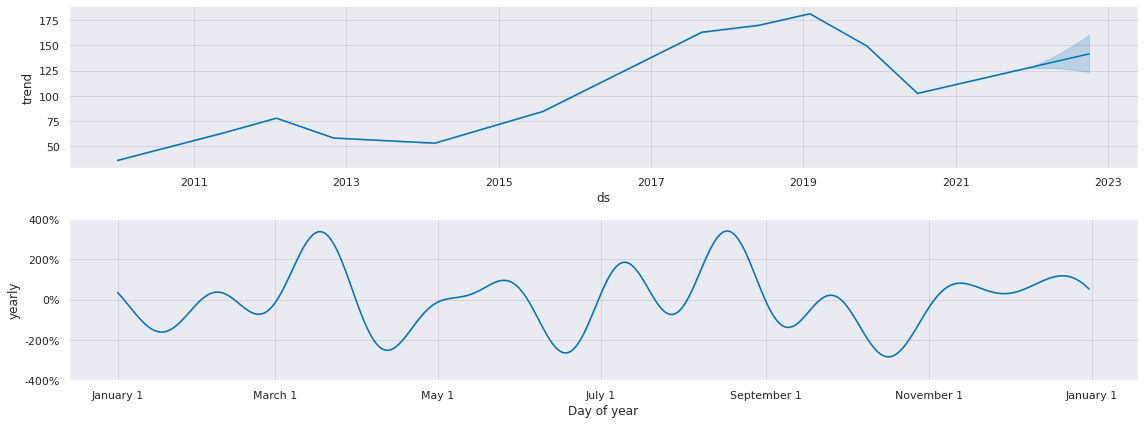

In [832]:
fig3 = m2.plot_components(forecast_reale,figsize=(16,6))
plt.title('Componenti '+column)
plt.tight_layout()

### GRAFICO DEI PUNTI DI CAMBIO DI TREND

In [833]:
#date changepoints
df = pd.DataFrame()
df['Change points '+column] = m2.changepoints
df.to_excel('Change points '+column+'.xlsx')

In [834]:
#numero di changepoints
print('Numero di change points: '+ str(m2.n_changepoints))

Numero di change points: 15


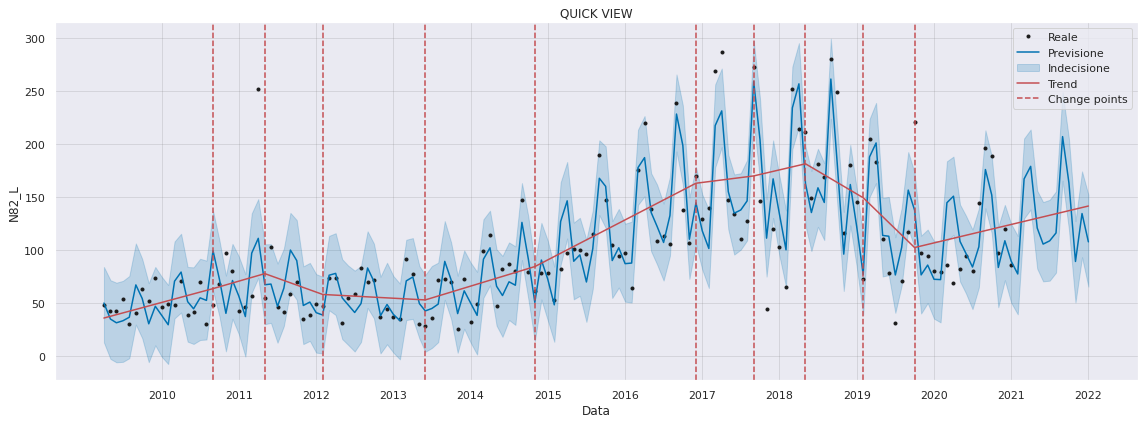

In [835]:
fig = m2.plot(forecast_reale,figsize=(16,6))
a = add_changepoints_to_plot(fig.gca(), m2, forecast_reale)
plt.xticks(ticks=[data for data in forecast_reale['ds'][9::12]],labels=[data.year for data in forecast_reale['ds'][9::12]])
plt.xlabel('Data')
plt.ylabel(column)
plt.legend(['Reale','Previsione','Indecisione','Trend','Change points'])
plt.tight_layout()
plt.title('QUICK VIEW '+column)
plt.tight_layout()

---